In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [58]:
data = pd.read_csv('cleaned_googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [59]:
#dropping duplicates before dividing by category
data = data.drop_duplicates()
data.App.is_unique

False

In [60]:
dups = data[data.App.duplicated(keep=False)]
dups.sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,28M,10000000,Free,0.0,Everyone,Social,2018-07-26,7.3.1,4.1 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,10000000,Free,0.0,Everyone,Weather,2018-08-06,Varies with device,Varies with device


In [61]:
#dropping unneeded columns, running drop duplicates() again, and gonna check this again
data = data.drop(['Rating','Size','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver'], axis=1)
data.head()

,App,Category,Reviews,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,10000
1,Coloring book moana,ART_AND_DESIGN,967,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,100000


In [62]:
data = data.drop_duplicates()
data.App.is_unique

False

In [63]:
dups = data[data.App.duplicated(keep=False)]
dups.sort_values('App')

,App,Category,Reviews,Installs
5415,365Scores - Live Scores,SPORTS,666246,10000000
3083,365Scores - Live Scores,SPORTS,666521,10000000
3953,8 Ball Pool,SPORTS,14184910,100000000
1755,8 Ball Pool,GAME,14200344,100000000
1871,8 Ball Pool,GAME,14201891,100000000
...,...,...,...,...
2637,textPlus: Free Text & Calls,SOCIAL,382121,10000000
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,133833,10000000
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,133825,10000000
3652,wetter.com - Weather and Radar,WEATHER,189313,10000000


In [64]:
drop_me = data[data.App.duplicated(keep='last')]
drop_me.index

Int64Index([   1,   23,   36,   42,  139,  143,  145,  146,  155,  157,
            ...
            3783, 3791, 3799, 3816, 3820, 3825, 3826, 3827, 3865, 3869],
           dtype='int64', length=696)

In [65]:
data = data.drop(drop_me.index)
data.App.is_unique

True

In [66]:
len(data)

9659

In [67]:
ent = data[data.Category == 'ENTERTAINMENT']
ent.Category.unique()

array(['ENTERTAINMENT'], dtype=object)

In [68]:
len(ent)

79

In [69]:
soc = data[data.Category == 'SOCIAL']
soc.Category.unique()

array(['SOCIAL'], dtype=object)

In [70]:
len(soc)

239

In [71]:
art = data[data.Category == 'ART_AND_DESIGN']
art.Category.unique()

array(['ART_AND_DESIGN'], dtype=object)

In [72]:
len(art)

61

In [73]:
wea = data[data.Category == 'WEATHER']
wea.Category.unique()

array(['WEATHER'], dtype=object)

In [74]:
len(wea)

79

In [75]:
ent.head()

,App,Category,Reviews,Installs
856,Complete Spanish Movies,ENTERTAINMENT,11656,1000000
857,Pluto TV - It’s Free TV,ENTERTAINMENT,28948,1000000
860,Mobile TV,ENTERTAINMENT,10939,10000000
861,TV+,ENTERTAINMENT,98509,5000000
862,Digital TV,ENTERTAINMENT,5241,5000000


In [76]:
soc.head()

,App,Category,Reviews,Installs
2551,Social network all in one 2018,SOCIAL,1403,100000
2553,TextNow - free text + calls,SOCIAL,441189,10000000
2555,The Messenger App,SOCIAL,4919,1000000
2556,Messenger Pro,SOCIAL,13762,1000000
2557,"Free Messages, Video, Chat,Text for Messenger ...",SOCIAL,6086,1000000


In [77]:
art.head()

,App,Category,Reviews,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,10000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,100000
5,Paper flowers instructions,ART_AND_DESIGN,167,50000


In [78]:
wea.head()

,App,Category,Reviews,Installs
3626,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,1558437,50000000
3627,Weather forecast,WEATHER,159455,1000000
3629,Live Weather Pro,WEATHER,892,10000
3630,"Weather by WeatherBug: Forecast, Radar & Alerts",WEATHER,981995,10000000
3631,weather - weather forecast,WEATHER,11118,1000000


(0.0, 10.0)

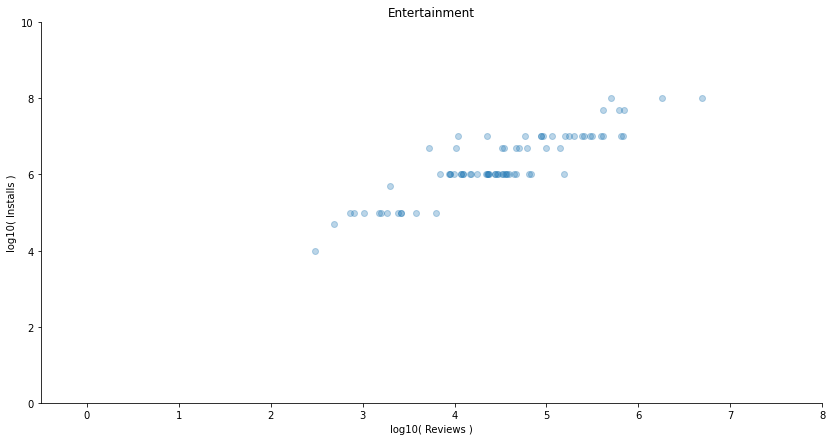

In [117]:
plt.figure(figsize=(14,7))
plt.scatter(np.log10(ent.Reviews), np.log10(ent.Installs), alpha=.3)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Entertainment')
plt.xlabel('log10( Reviews )')
plt.ylabel('log10( Installs )')
plt.xlim(-.5, 8)
plt.ylim(0, 10)

(0.0, 10.0)

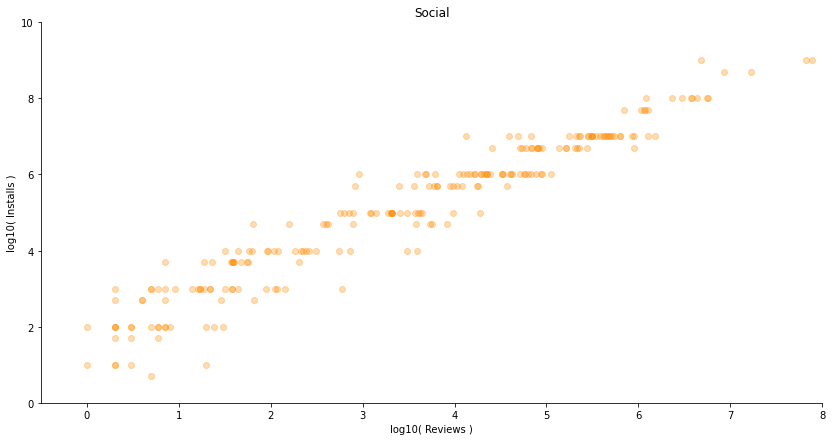

In [118]:
#entertainment is a positive linear correlation

plt.figure(figsize=(14,7))
plt.scatter(np.log10(soc.Reviews), np.log10(soc.Installs), alpha=.3, color='darkorange')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Social')
plt.xlabel('log10( Reviews )')
plt.ylabel('log10( Installs )')
plt.xlim(-.5, 8)
plt.ylim(0, 10)

(0.0, 10.0)

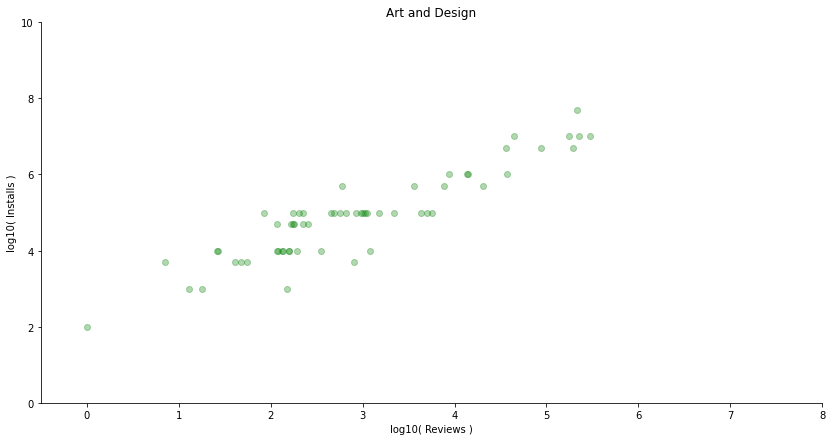

In [119]:
#social is a positive linear correlation
#also divide by zero notice??? double check for zero values

plt.figure(figsize=(14,7))
plt.scatter(np.log10(art.Reviews), np.log10(art.Installs), alpha=.3, color='green')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Art and Design')
plt.xlabel('log10( Reviews )')
plt.ylabel('log10( Installs )')
plt.xlim(-.5, 8)
plt.ylim(0, 10)

(0.0, 10.0)

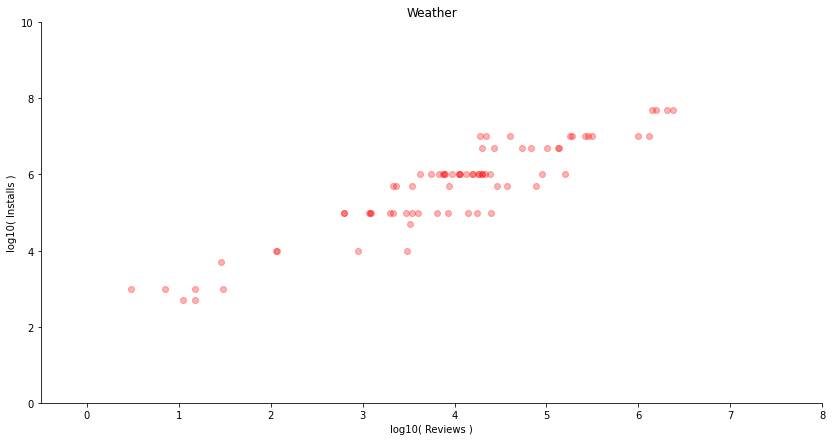

In [120]:
#art is also positive linear correlation

plt.figure(figsize=(14,7))
plt.scatter(np.log10(wea.Reviews), np.log10(wea.Installs), alpha=.3, color='red')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Weather')
plt.xlabel('log10( Reviews )')
plt.ylabel('log10( Installs )')
plt.xlim(-.5, 8)
plt.ylim(0, 10)

In [28]:
#so is weather
#so all apps have a positive linear correlation

#heatmap for proof
data = pd.concat([ent, soc, art, wea])
data.Category.unique()

array(['ENTERTAINMENT', 'SOCIAL', 'ART_AND_DESIGN', 'WEATHER'],
      dtype=object)

In [29]:
data

,App,Category,Reviews,Installs
856,Complete Spanish Movies,ENTERTAINMENT,11656,1000000
857,Pluto TV - It’s Free TV,ENTERTAINMENT,28948,1000000
860,Mobile TV,ENTERTAINMENT,10939,10000000
861,TV+,ENTERTAINMENT,98509,5000000
862,Digital TV,ENTERTAINMENT,5241,5000000
...,...,...,...,...
10611,"Clearwater, FL - weather and more",WEATHER,0,10
10624,"St. Petersburg, FL - weather and more",WEATHER,0,10
10626,WSVN • South Florida's Source for Weather,WEATHER,7,1000
10712,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,3471,100000


<AxesSubplot:>

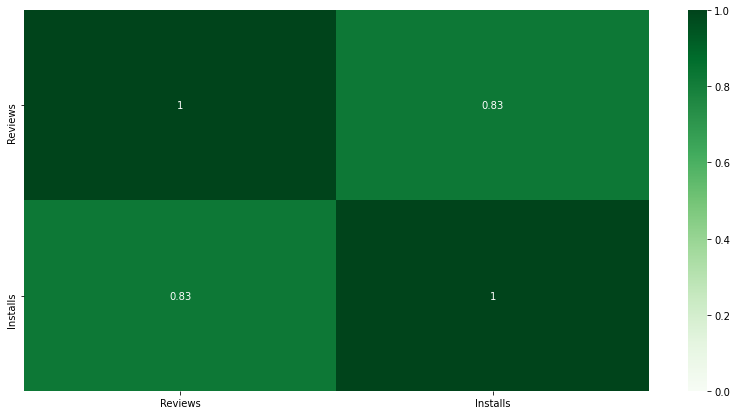

In [30]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(data.corr(), ax=ax, vmin=0, annot=True, cmap="Greens")

<AxesSubplot:>

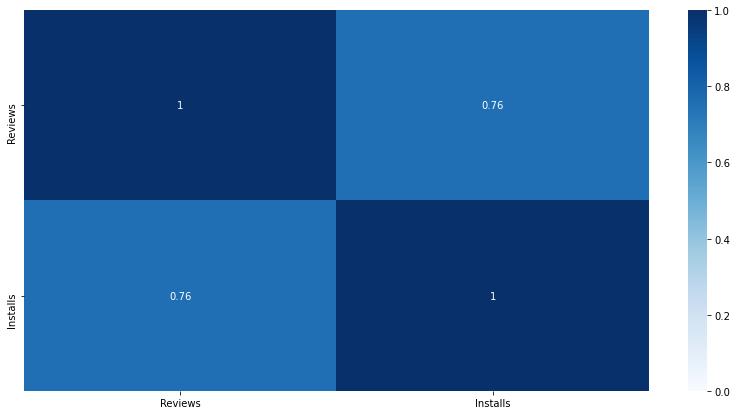

In [95]:
# ... why did i think that was going to work
#of course its not going to split up the categories for you, sheesh
#label encoding isn't gonna do it either, display each heatmap individually
#also what you're probs gonna need for the report is a different color for each category

f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(ent.corr(), ax=ax, vmin=0, annot=True, cmap="Blues")

<AxesSubplot:>

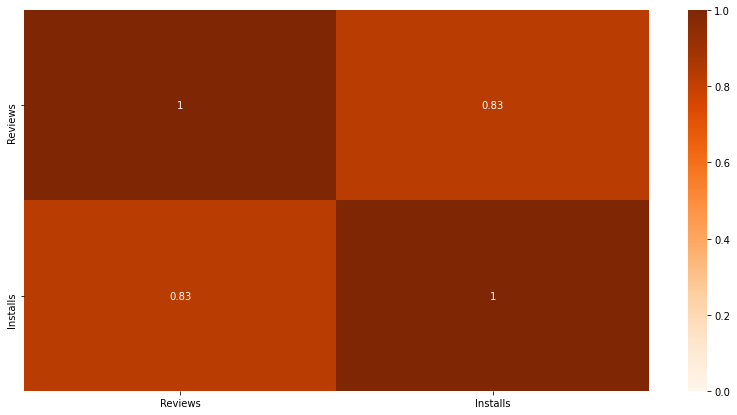

In [99]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(soc.corr(), ax=ax, vmin=0, annot=True, cmap="Oranges")

<AxesSubplot:>

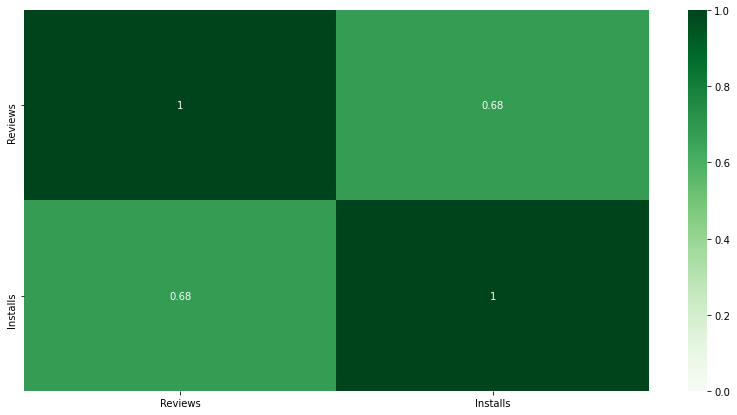

In [33]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(art.corr(), ax=ax, vmin=0, annot=True, cmap="Greens")

<AxesSubplot:>

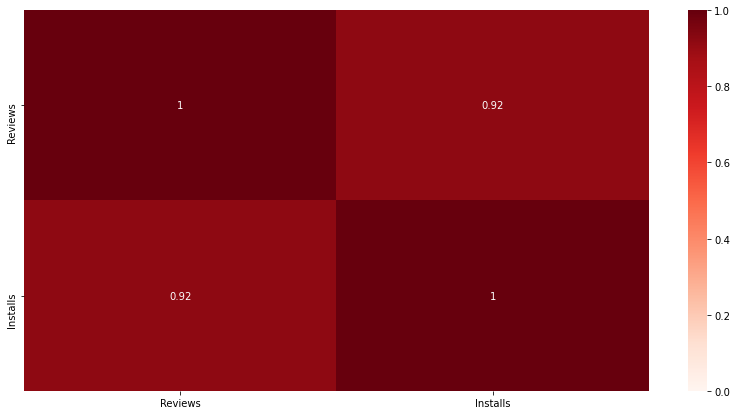

In [100]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(wea.corr(), ax=ax, vmin=0, annot=True, cmap="Reds")

In [102]:
#frequency
data = pd.concat([ent, soc, art, wea])

cat_unique = data.Category.unique()

temp_dict = {}
for i in range(len(cat_unique)):
    temp_row = {cat_unique[i]:[len(data[data.Category == cat_unique[i]])]}
    temp_dict.update(temp_row)

df = pd.DataFrame(temp_dict)  
df = df.melt()
df.columns = ['Category', 'Frequency']
df = df.sort_values(by='Category', ascending=True)
df = df.reset_index(drop=True)

#df.to_csv('category_freq.csv', sep=',', index=False)

df

,Category,Frequency
0,ART_AND_DESIGN,61
1,ENTERTAINMENT,79
2,SOCIAL,239
3,WEATHER,79


(0.0, 10.0)

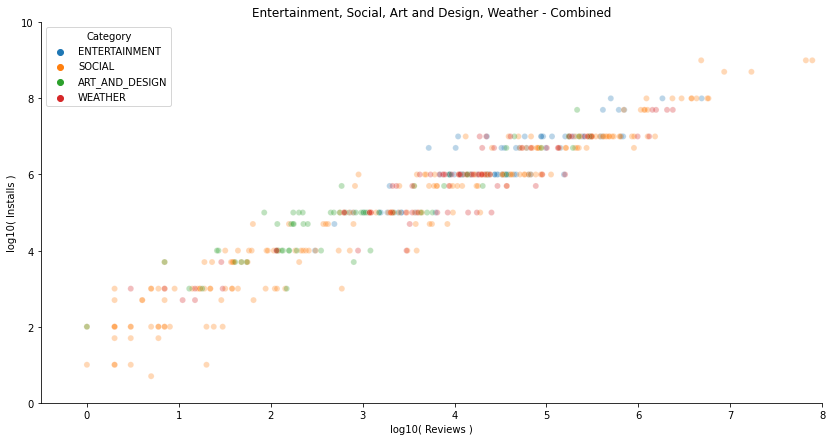

In [116]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=np.log10(data.Reviews), y=np.log10(data.Installs), alpha=.3, hue=data.Category)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Entertainment, Social, Art and Design, Weather - Combined')
plt.xlabel('log10( Reviews )')
plt.ylabel('log10( Installs )')
plt.xlim(-.5, 8)
plt.ylim(0, 10)

In [105]:
len(data)

458